In [289]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [271]:
X=pd.read_csv('./Dataset/Training/Linear_X_Train.csv').values
Y=pd.read_csv('./Dataset/Training/Linear_Y_Train.csv').values

In [272]:
#X=np.random.randn(100)
#e=np.random.randn(100)
#Y=X*2-5-e
X=X[:700,]
Y=Y[:700,]

In [260]:
theta=np.zeros((2,1))
#theta[0]=slope
#theta[1]=intercept

In [261]:
def hypothesis(X,theta):
    return theta[0]*X+theta[1]

In [262]:

def error(Y,h):
    sum=0
    for i in range(X.shape[0]):
        sum+=(Y[i]-h[i])**2
    return sum
    

In [263]:
#gradient_descent

def grad(x,y,theta):
    grad1=np.zeros((2,1),dtype=np.float64)
    for i in range(X.shape[0]):
        grad1[0]+=2*(theta[0]*x[i]+theta[1]-y[i])*x[i]
        grad1[1]+=2*(theta[0]*x[i]+theta[1]-y[i])
    return grad1


In [264]:
#theta update
def theta_update(X,Y,learning_rate=0.001,steps=1000):
    e_list=[]
    for i in range(steps):
        grad1=grad(X,Y,theta)
        theta[0]=theta[0]-learning_rate*grad1[0]
        theta[1]=theta[1]-learning_rate*grad1[1]

        #print(theta)
        h=hypothesis(X,theta)
        e1=error(Y,h)
        e_list.append(e1)
    return theta,e_list

In [265]:
h=hypothesis(X,theta)


In [273]:
A,B=theta_update(X,Y)
    

In [274]:
g=theta[0]*X+theta[1]

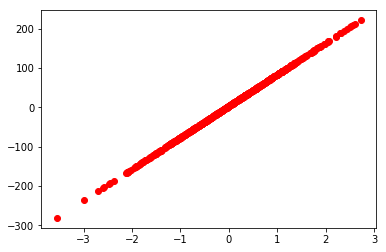

In [282]:
plt.scatter(X,g,c="red")
#plt.scatter(X,Y)
plt.show()

In [276]:
A

array([[80.16996184],
       [ 3.53894724]])

In [277]:
X.shape

(700, 1)

In [278]:
X_Test=pd.read_csv('./Dataset/Testing/Linear_X_Test.csv').values

In [280]:
X_Test.shape

(1250, 1)

In [284]:
theta[0]


array([80.16996184])

In [297]:
Pred_Y=[]
for i in X_Test:
    val=theta[0]*i+theta[1]
    Pred_Y.append(val)

In [298]:
Pred_Y=np.array(Pred_Y)

In [299]:
Pred_Y.shape

(1250, 1)

In [300]:
Pred_Y

array([[-147.01578477],
       [ -66.13130829],
       [-199.30568119],
       ...,
       [  13.80132938],
       [ -18.75131572],
       [ -51.01073339]])

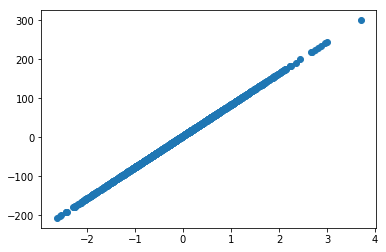

In [301]:
plt.scatter(X_Test,Pred_Y)

In [308]:
import csv
with open('./Dataset/mycsv.csv','w',newline='')as f:
    fieldnames=['Y']
    thewriter=csv.DictWriter(f,fieldnames=fieldnames)
    thewriter.writeheader()
    for i in range(Pred_Y.shape[0]):
        thewriter.writerow({'Y':Pred_Y[i,0]})